# Model Development

Question: Do I know if the dealer is offering fair value for my trade-in?


Question: Do I know if I put a fair value on my car?

In [1]:
# we use Model Development to help us predict future observations from data we have
# a model will help us understand the exact relationship between different variables
# and how these variables are used to predict the result

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path of data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Liniar Regression and Multiple Linear Regression

1. Linear Regression / Simple Linear Regression

In [4]:
# is a method to help us understand the relationship between two variables:
# the predictor/independent variable (X)
# the response/dependent variable (that we want to predict) (Y)

In [5]:
# the result of Linear Regression is a linear function that predicts the response (dependent) variable
# as a function of the predictor(independent) variable

In [6]:
# Linear function:
# Y: Response Variable
# X: Predictor Variables
# Yhat = a + bX

In [7]:
# a refers at the intercept of the regression line0, in other words: the value of Y when X is 0
# b refers to the slope of the regression line, in other words: the value with wich Y changes when X increases by 1 unit

In [8]:

# load modules for linear regression
from sklearn.linear_model import LinearRegression

In [9]:
# create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)




Question: How could highway-mpg help us predict car price?

In [10]:
# we create a linear function with highway-mpg as the predictor variable and the price as the response variable
X = df[['highway-mpg']]
Y = df[['price']]

In [11]:
# fit the linear model using highway-mpg
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# we can output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[ 16236.50464347],
       [ 16236.50464347],
       [ 17058.23802179],
       [ 13771.3045085 ],
       [ 20345.17153508]])

What is the value of the intercept(a)?

In [13]:
lm.intercept_

array([ 38423.30585816])

What is the value of the Slope(b)?

In [14]:
lm.coef_

array([[-821.73337832]])

What is the final estimated linear model we get?

In [15]:
# as we saw above we should get a final linear model with the structure
# Yhat = a + bX

# price = 38423.31 - 821.73*highway-mpg

In [16]:
# create a linear regression object
lm1 = LinearRegression()

In [17]:
# train the model using 'engine-size' as the independent variable and 'price' as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# find the slope and intercept of the model

# intercept
lm1.intercept_

array([-7963.33890628])

In [19]:
# slope
lm1.coef_

array([[ 166.86001569]])

In [20]:
# what is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?

# Yhat = a + bX
# Yhat = 38423.31-821.733*X

# price = 38423.31-821.733*engine-size

2. Multiple Linear Regression

In [21]:
# what if we want to predict car price using more than one variable?
# we can use Multiple Linear Regression
# it is used to explain the relationship between one continuous response (dependent) variable and two or more predictor variables

In [22]:
# most of the real-world regression models involve multiple predictors.
# below we are using four predictor variables

# Y: Response Variable (Targe)
# X1: Predictor Variable1
# X2: Predictor Variable2
# X3: Predictor Variable3
# X4: Predictor Variable4

# a: intercept
# b1: coefficients of Variable1
# b2: coefficients of Variable2
# b3: coefficients of Variable3
# b4: coefficients of Variable4

# Equation is given by:
# Yhat = a + b1X1 + b2X2 + b3X3 +b4X4

In [23]:
# from the previous section we know that other good predictors of price could be:
# horsepower
# curb-weight
# engine-size
# highway-mpg

In [24]:
# we can create a model using these variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:
# fit the linear model using the four above-mentioned variables
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# intercept
lm.intercept_

-15806.62462632922

In [27]:
# slope
lm.coef_

array([ 53.49574423,   4.70770099,  81.53026382,  36.05748882])

In [28]:

# create and train a Multiple Linear Regression model "lm2" where the response variable is price
# and the predictor varible is 'normalized-losses' and 'highway-mpg'

# create Linear Regresion object, lm2
lm2 = LinearRegression()

# train the model using following predictor variables: normalized-losses, highway-mpg
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# find the coeficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

# Model Evaluation using Visualization

In [30]:
# Now that we have developed some models, how do we evaluate our models and how do we choose the best one?
# One way is to do this by using visualization

In [31]:
import seaborn as sns
%matplotlib inline

# Regression Plot

In [32]:
# when it comes to simple linear regression, an excellent way to visualize the fit of our model is using regression plots

In [33]:
# this plot shows a combination of scattered data points as well the fitted linear regression line going through data

(0, 48258.762888347002)

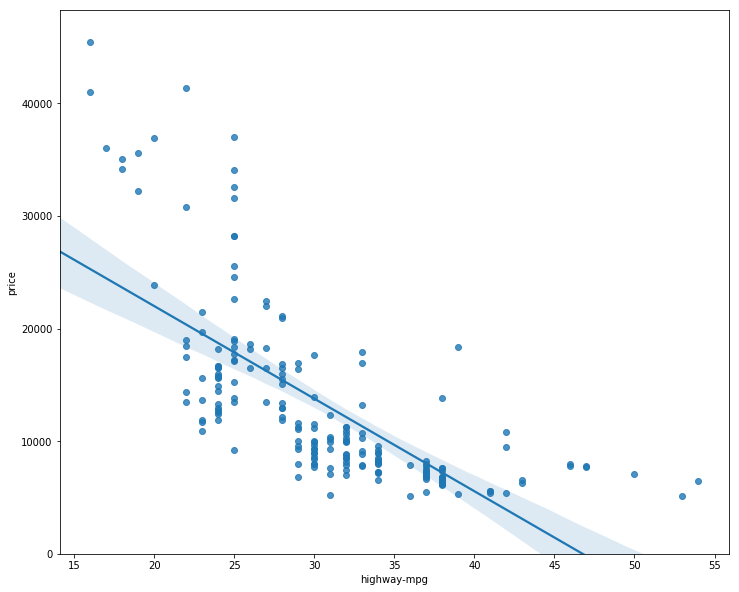

In [34]:
# let's visualize horsepower as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [35]:
# we can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative
# one thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are
# around the regression line.
# This will give you a good indication of the variance of the data, and whether a linear model is a best fit or not.
# If the data is too far off from the line, the linear model might not be the best model for this data.

(0, 47422.919330307624)

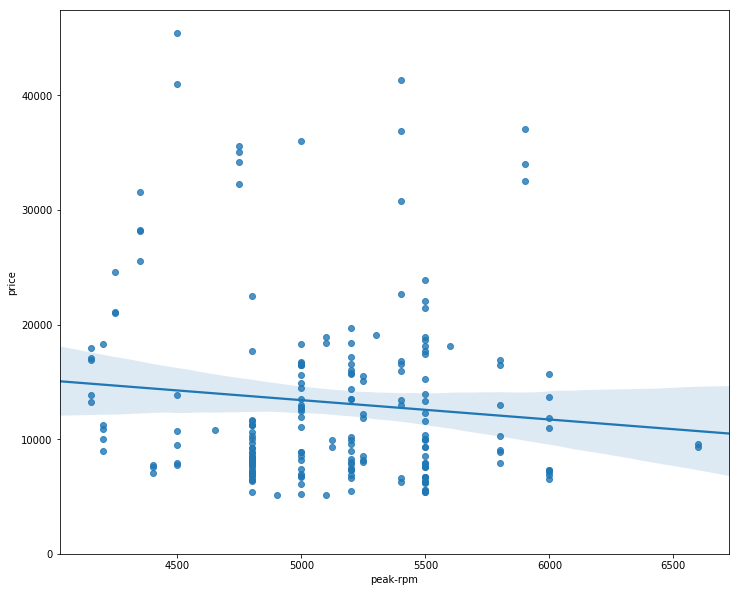

In [36]:
# let's compare this plot to the regression plot of peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [37]:
# comparing the regression plot of peak-rpm and highway-mpg, we see that the points for highway-mpg are much closer
# to the generated line and on the average decrease. 
# The points for peak-rpm are more spread around the predicted line, and it is much harder to determine if the points
# are decreasing or increasing as the highway-mpg increases

Question: Given the regression plots above 'peak-rpm' or 'highway-mpg' whcih is more strongly correlated with 'price'?

In [38]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [39]:
# Answer: The variable highway-mpg has a stronger correlation with price, it is aproximately -0.704692 compared to
#         -0.101616 of variable peak-rpm

# Residual Plot

In [40]:
# A good way to visualize the variance of data is to use a residual plot
# What is residual?

# Is the difference between the observed value(y) and the predicted value (Yhat) is called residual(e)
# When we look at a regression plot, the residual is the distance from the data point to the fitted regression line

# What is a resual plot?
# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis

In [41]:
# What do we pay attention to when looking at a residual plot?
# We look at the spread of residuals

# If the points in a residual plot are randomly spread out around the a-xis, then a linear model is appropriate for data

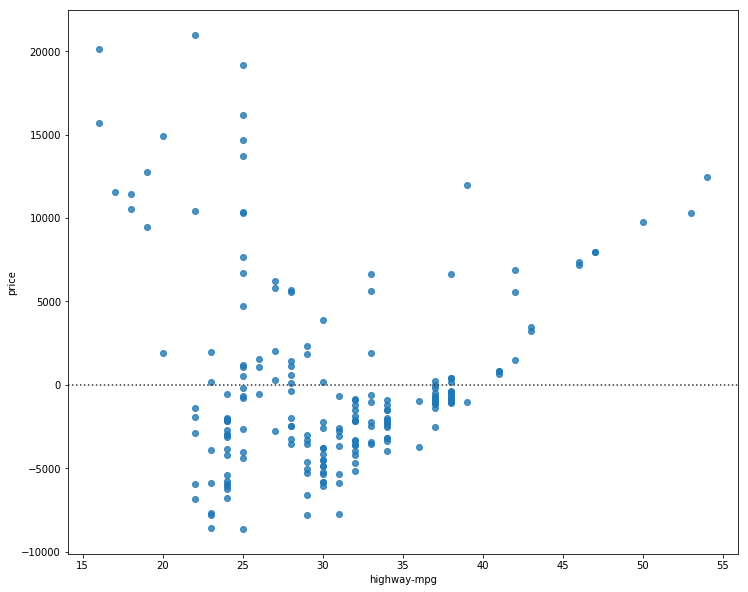

In [42]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [43]:
# from the figure above we can see that the residuals are not randomly spread around the x-axis
# which leads us to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression

In [44]:
# How do we visualize a model for Multiple Linear Regression?
# This gets complicated because you can't visualize it with regression or residual plot.

In [45]:
# One way to look at the fit of the model is by lookign at the distribution plot
# We can look at the distribution of the fitted values from the model and compare it to the distribution of actual values

In [46]:
# we make a prediction
Y_hat = lm.predict(Z)

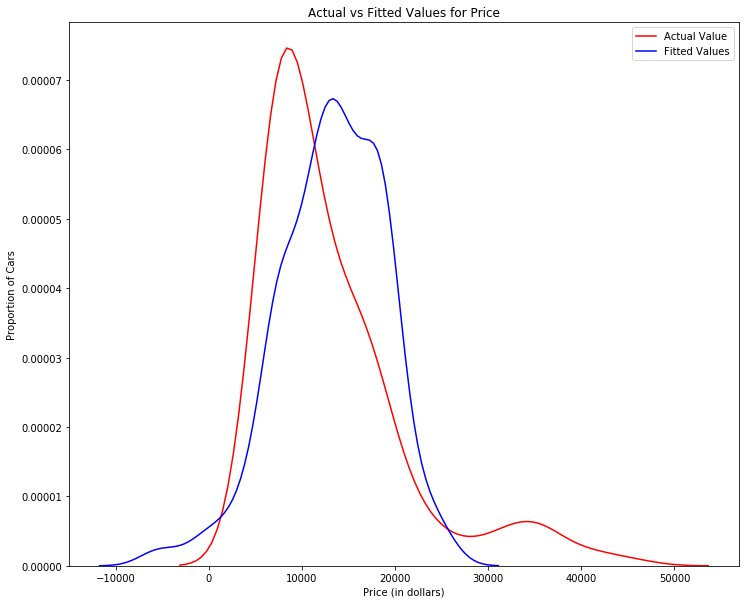

In [47]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression and Pipelines

In [48]:
# Polinomial regression is a particular case of the general linear regression model or multiple linear regression models

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables

# There are different orders of polynomial regression:
# Quadric - 2nd order                                  Yhat = a + b1X^2 + b2X^2
# Cubic   - 3rd order                                  Yhat = a + b1X^2 + b2X^2 + b3X^3
# Higher order                                         Yhat = a + b1X^2 + b2X^2 + b3X^3 ....

In [49]:
# we saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable
# let's see if we can try fitting a polynomial model to the data instead

In [50]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [51]:
# lets get the variables
x = df['highway-mpg']
y = df['price']

In [52]:
# lets fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function

# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


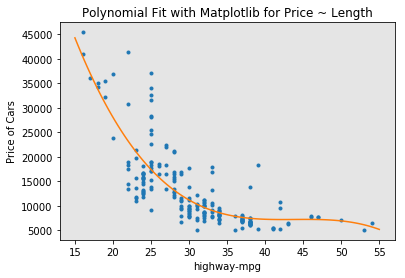

In [53]:
# lets plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [54]:
np.polyfit(x, y, 3)

array([ -1.55663829e+00,   2.04754306e+02,  -8.96543312e+03,
         1.37923594e+05])

In [55]:
# we can already see from plotting that this polynomial model performs better than the linear model
# this is because the generated polynomial function hits more of the data points

Question: Create 11 order polynomial model with the variable x and y from above?

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


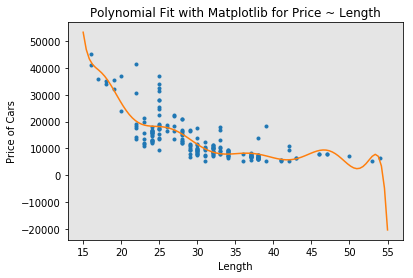

In [56]:
# calculate polynomial
# here we use a polynomial of the 3rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

PlotPolly(p1, x, y, 'Length')

In [57]:
# we can perform a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# we create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [59]:
Z_pr = pr.fit_transform(Z)

In [60]:
# the original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [61]:
# after the transformation, there are 201 samples and 15 features
Z_pr.shape

(201, 15)

# Pipeline

In [62]:
# Data Pipelines simplify the steps of processing the data.
# We use the module Pipleline to create a pipeline.
# We also use StandardScaler as a step in our pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
# we create the pipeline, by creating a list of tuples including the name of the model and its corresponding constructor
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [65]:
# we input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [66]:
# we can normalize the data, perform a transform and fit the model simultaneously
pipe.fit(Z,y)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dacy/.local/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [67]:
# similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe = pipe.predict(Z)
ypipe[0:4]

/home/dacy/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 13102.74784201,  13102.74784201,  18225.54572197,  10390.29636555])

Question: Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [68]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

In [69]:
pipe = Pipeline(Input)

In [70]:
pipe.fit(Z, y)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dacy/.local/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [71]:
ypipe = pipe.predict(Z)
ypipe[0:10]

/home/dacy/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 13699.11161184,  13699.11161184,  19051.65470233,  10620.36193015,
        15521.31420211,  13869.66673213,  15456.16196732,  15974.00907672,
        17612.35917161,  10722.32509097])

# Measures for In-Sample Evaluation

In [72]:
# when we evaluate our models, not only do we want to visualize the results, but we also want a quantitative
# measure to determine how accurate the model is.


# Two very important measures that are often used in Statistics to determine the accuracy of a model are:
# R^2 / R-squared: indicates how close the data is to the fitted regression line
# Mean Squared Error (MSE): measures the average of the squares of errors, that is, the difference between actual value
#                           (y) and the estimated value y

# Model 1: Simple Linear Regression

In [73]:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.496591188434


In [74]:
# we can say that ~49% of the variation of the price is explained by this simple linear model 'horsepower_fit'

In [75]:
# lets calculate the MSE (Mean Squared Error)
# we can predict the output e.g yhat using the predict method where X is the input variable
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[ 16236.50464347]
 [ 16236.50464347]
 [ 17058.23802179]
 [ 13771.3045085 ]]


In [76]:
# we import mean_squared_error form the module metrics
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.9446


# Model 2: Multiple Linear Regression

In [78]:
# lets calculate R^2
# fit the model
lm.fit(Z, df['price'])

# find the R^2
print('The R-square is:', lm.score(Z, df['price']))

The R-square is: 0.809356280658


In [79]:
# we can say that ~80.93% of the variation of price is explained by this multiple linear regresion "multi_fit"

In [80]:
# lets calculate the MSE (Mean Squared Error)

# we produce a prediction
Y_predict_multifit = lm.predict(Z)

In [81]:
# we compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Y_predict_multifit)

In [82]:
print('The mean square error of price and predicted values is:', mse)

The mean square error of price and predicted values is: 11980366.8707


# Model 3: Polynomial Fit

In [83]:
# lets calculate the R^2
# we import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [84]:
# we apply the function to get the value of r^2

In [85]:
r_squared = r2_score(y, p(x))
print('The R-square value is:', r_squared)

The R-square value is: 0.674194666391


In [86]:
# we can say that ~67% of the variation of price is explained by this polynomial fit

In [87]:
# we can calculate the MSE (Mean Squared Error)
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction and Decision Making

# Prediction

In [88]:
# in the previous section, we trained the model using the method fit.
# now we will use the method predict to produce a prediction.

import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# create a new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [90]:
# fit the model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([[ 37601.57247984],
       [ 36779.83910151],
       [ 35958.10572319],
       [ 35136.37234487],
       [ 34314.63896655]])

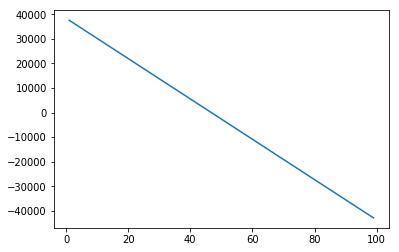

In [92]:
# we can plot the data
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

In [93]:
# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits
# How do we determine a good model fit?

# What is a good R-squared value?
# Answer: When comparing models, the model with the higher R-squared value is a better fit for the data

# What is a good MSE?
# Answer: When comparing models, the model with the smallest MSE value si a better fit for the data


In [94]:
# We take a look at the values for the different models
# Simple Linear Regression: using Highway-mpg as Predictor variable of Price

# R-squared: 0.49659118843391759
# MSE: 3.16 x10^7

In [95]:
# Multiple Linear Regression: using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor variables of Price

# R-squared: 0.80896354913783497
# MSE: 1.2 x10^7

In [96]:
# Polinomial Fit: using Highway-mpg as Predictor variable of Price

# R-squared: 0.6741946663906514
# MSE: 2.05 x 10^7

# Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

In [97]:
# usualy the more variables you have, the better your model is at predicting
# but not always is true

# sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful
# and or even act as noise.
# as a result you should always check the MSE and R^2

In [98]:

# the MSE of SLR is 3.16*10^7 while MLR has an MSE of 1.2*10^7. The MSE of MLR is much smaller
# the R-squared shows that is a big difference between SLR and MLR. The R-squared for the SLR (~0.497) is very small
# compared to the R-squared for the MLR (~0.809)

In [99]:
# This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared
# to SLR

# Simple Linear Model (SLR) vs Polynomial Fit

In [100]:
# MSE: we can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR
# R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought
# up the R-squared quite a bit

In [101]:
# Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better
# fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable

# Multiple Linear Regression (MLR) vs Polynomial Fit

In [102]:
# MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit
# R-squared: for the MLR is also much larger than for the Polynomial Fit

# CONCULSION:
# Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our
# dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables
# are potential predictors of the final car price.